In [88]:
# !pip install spotipy 
# !pip install lyricsgenius
# !conda install -c conda-forge wordcloud --yes

## Data Collection

In [89]:
def get_album_songs(uri_info):
    uri = []
    track = []
    duration = []
    explicit = []
    track_number = []
    one = sp.album_tracks(uri_info, limit=50, offset=0, market='US')
    df1 = pd.DataFrame(one)
    
    for i, x in df1['items'].items():
        uri.append(x['uri'])
        track.append(x['name'])
        duration.append(x['duration_ms'])
        explicit.append(x['explicit'])
        track_number.append(x['track_number'])
    
    df2 = pd.DataFrame({
    'uri':uri,
    'track':track,
    'duration_ms':duration,
    'explicit':explicit,
    'track_number':track_number})
    
    return df2

In [90]:
def get_track_info(df):
    danceability = []
    energy = []
    key = []
    loudness = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    
    for i in df['uri']:
        for x in sp.audio_features(tracks=[i]):
            danceability.append(x['danceability'])
            energy.append(x['energy'])
            key.append(x['key'])
            loudness.append(x['loudness'])
            speechiness.append(x['speechiness'])
            acousticness.append(x['acousticness'])
            instrumentalness.append(x['instrumentalness'])
            liveness.append(x['liveness'])
            valence.append(x['valence'])
            tempo.append(x['tempo'])
            
    df2 = pd.DataFrame({
    'danceability':danceability,
    'energy':energy,
    'key':key,
    'loudness':loudness,
    'speechiness':speechiness,
    'acousticness':acousticness,
    'instrumentalness':instrumentalness,
    'liveness':liveness,
    'valence':valence,
    'tempo':tempo})
    
    return df2

In [91]:
def popularity(df):
    empty = []
    for i in df['uri']:
            series_track = pd.Series(sp.track(i))
            empty.append(series_track)
    df2 = pd.DataFrame(empty)
    return df2

In [92]:
def add_popularity(df):
    pop = popularity(df)
    df['popularity'] = pop['popularity']
    return df.head()

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import config
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
import requests
import os 
import re
from lyricsgenius import Genius
import json
from nltk import word_tokenize
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from function import *

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(config.spotify['client_id'],
                                                                        config.spotify['client_secret']))

In [94]:
url = 'https://open.spotify.com/album/43otFXrY0bgaq5fB3GrZj6?si=_GGcUScGTK-P2LsvPnk2yQ&dl_branch=1'
uri = 'spotify:album:43otFXrY0bgaq5fB3GrZj6'

In [95]:
album = get_album_songs(uri)
album

,uri,track,duration_ms,explicit,track_number
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5
5,spotify:track:6GsP3uMCd0Dn5T37C93waZ,Sick Love,221440,False,6
6,spotify:track:5m578MgxuEC956dulprCe8,Go Robot,263800,False,7
7,spotify:track:0SMzXgUFqcAt0WNCsGm3tM,Feasting on the Flowers,202933,False,8
8,spotify:track:5y7IfSDhBHFVnlGj1UrlA1,Detroit,226640,False,9
9,spotify:track:3iXNy7VaY9OqJFBwzhmbOh,This Ticonderoga,215200,False,10


In [96]:
song_info = get_track_info(album)
song_info

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999
1,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959
2,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038
3,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158
4,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597
5,0.591,0.794,4,-5.935,0.0690,0.183000,0.000000,0.2920,0.875,147.974
6,0.852,0.651,8,-6.254,0.0411,0.043200,0.019200,0.1580,0.960,131.010
7,0.670,0.750,6,-5.502,0.0583,0.137000,0.000004,0.1970,0.880,82.041
8,0.439,0.885,4,-4.679,0.0625,0.000277,0.003670,0.3720,0.495,92.738
9,0.238,0.949,8,-4.575,0.2470,0.016000,0.000000,0.0864,0.405,87.843


In [97]:
the_getaway = album.merge(song_info, left_index=True, right_index=True)
the_getaway

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597
5,spotify:track:6GsP3uMCd0Dn5T37C93waZ,Sick Love,221440,False,6,0.591,0.794,4,-5.935,0.0690,0.183000,0.000000,0.2920,0.875,147.974
6,spotify:track:5m578MgxuEC956dulprCe8,Go Robot,263800,False,7,0.852,0.651,8,-6.254,0.0411,0.043200,0.019200,0.1580,0.960,131.010
7,spotify:track:0SMzXgUFqcAt0WNCsGm3tM,Feasting on the Flowers,202933,False,8,0.670,0.750,6,-5.502,0.0583,0.137000,0.000004,0.1970,0.880,82.041
8,spotify:track:5y7IfSDhBHFVnlGj1UrlA1,Detroit,226640,False,9,0.439,0.885,4,-4.679,0.0625,0.000277,0.003670,0.3720,0.495,92.738
9,spotify:track:3iXNy7VaY9OqJFBwzhmbOh,This Ticonderoga,215200,False,10,0.238,0.949,8,-4.575,0.2470,0.016000,0.000000,0.0864,0.405,87.843


In [98]:
pop = popularity(the_getaway)
pop

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,250386,False,{'isrc': 'USWB11600617'},{'spotify': 'https://open.spotify.com/track/3b...,https://api.spotify.com/v1/tracks/3bIQIx7hveYP...,3bIQIx7hveYPQDdhjZ1kcq,False,The Getaway,61,https://p.scdn.co/mp3-preview/72fb1fa491d3aed9...,1,track,spotify:track:3bIQIx7hveYPQDdhjZ1kcq
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,302000,False,{'isrc': 'USWB11600478'},{'spotify': 'https://open.spotify.com/track/2o...,https://api.spotify.com/v1/tracks/2oaK4JLVnmRG...,2oaK4JLVnmRGIO9ytBE1bt,False,Dark Necessities,72,https://p.scdn.co/mp3-preview/603321bf69cb0fd2...,2,track,spotify:track:2oaK4JLVnmRGIO9ytBE1bt
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,200466,False,{'isrc': 'USWB11600618'},{'spotify': 'https://open.spotify.com/track/0c...,https://api.spotify.com/v1/tracks/0cv2LgkvEoQi...,0cv2LgkvEoQiGgFWcZaAMA,False,We Turn Red,52,https://p.scdn.co/mp3-preview/7401884887b72bf4...,3,track,spotify:track:0cv2LgkvEoQiGgFWcZaAMA
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,211520,False,{'isrc': 'USWB11600619'},{'spotify': 'https://open.spotify.com/track/0p...,https://api.spotify.com/v1/tracks/0pjCkLjbgSLn...,0pjCkLjbgSLn5c0Ilwuv8z,False,The Longest Wave,60,https://p.scdn.co/mp3-preview/0800193b0d8994cf...,4,track,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,268733,False,{'isrc': 'USWB11600620'},{'spotify': 'https://open.spotify.com/track/2X...,https://api.spotify.com/v1/tracks/2XTkpF9T2PKv...,2XTkpF9T2PKvcLgamGJGx1,False,Goodbye Angels,63,https://p.scdn.co/mp3-preview/69191d42691a7605...,5,track,spotify:track:2XTkpF9T2PKvcLgamGJGx1
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,221440,False,{'isrc': 'USWB11600621'},{'spotify': 'https://open.spotify.com/track/6G...,https://api.spotify.com/v1/tracks/6GsP3uMCd0Dn...,6GsP3uMCd0Dn5T37C93waZ,False,Sick Love,64,https://p.scdn.co/mp3-preview/cc7db96c4aef501a...,6,track,spotify:track:6GsP3uMCd0Dn5T37C93waZ
6,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,263800,False,{'isrc': 'USWB11600622'},{'spotify': 'https://open.spotify.com/track/5m...,https://api.spotify.com/v1/tracks/5m578MgxuEC9...,5m578MgxuEC956dulprCe8,False,Go Robot,62,https://p.scdn.co/mp3-preview/e6c44098fc6b6386...,7,track,spotify:track:5m578MgxuEC956dulprCe8
7,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,202933,False,{'isrc': 'USWB11600623'},{'spotify': 'https://open.spotify.com/track/0S...,https://api.spotify.com/v1/tracks/0SMzXgUFqcAt...,0SMzXgUFqcAt0WNCsGm3tM,False,Feasting on the Flowers,52,https://p.scdn.co/mp3-preview/ecdacb03bb20ae47...,8,track,spotify:track:0SMzXgUFqcAt0WNCsGm3tM
8,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,226640,False,{'isrc': 'USWB11600624'},{'spotify': 'https://open.spotify.com/track/5y...,https://api.spotify.com/v1/tracks/5y7IfSDhBHFV...,5y7IfSDhBHFVnlGj1UrlA1,False,Detroit,56,http

In [99]:
pop['popularity']

0     61
1     72
2     52
3     60
4     63
5     64
6     62
7     52
8     56
9     49
10    54
11    50
12    49
Name: popularity, dtype: int64

In [100]:
the_getaway['popularity'] = pop['popularity']
the_getaway

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999,61
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959,72
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038,52
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158,60
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597,63
5,spotify:track:6GsP3uMCd0Dn5T37C93waZ,Sick Love,221440,False,6,0.591,0.794,4,-5.935,0.0690,0.183000,0.000000,0.2920,0.875,147.974,64
6,spotify:track:5m578MgxuEC956dulprCe8,Go Robot,263800,False,7,0.852,0.651,8,-6.254,0.0411,0.043200,0.019200,0.1580,0.960,131.010,62
7,spotify:track:0SMzXgUFqcAt0WNCsGm3tM,Feasting on the Flowers,202933,False,8,0.670,0.750,6,-5.502,0.0583,0.137000,0.000004,0.1970,0.880,82.041,52
8,spotify:track:5y7IfSDhBHFVnlGj1UrlA1,Detroit,226640,False,9,0.439,0.885,4,-4.679,0.0625,0.000277,0.003670,0.3720,0.495,92.738,56
9,spotify:track:3iXNy7VaY9OqJFBwzhmbOh,This Ticonderoga,215200,False,10,0.238,0.949,8,-4.575,0.2470,0.016000,0.000000,0.0864,0.405,87.843,49


In [101]:
uris = ['spotify:album:43otFXrY0bgaq5fB3GrZj6','spotify:album:0fLhefnjlIV3pGNF9Wo8CD',
        'spotify:album:7xl50xr9NDkd3i2kBbzsNZ',
        'spotify:album:1jWKVgnHX8nwR551hQNx5K','spotify:album:1DCI2yWmV4UI7Aga71yx9B',
        'spotify:album:5wZtSIvijWCMc1vlPFqAyB','spotify:album:74cQBDmkkzRBntR064f0SD',
        'spotify:album:1oOkcBu5bgkUzZTvKD1m8z','spotify:album:3rHJQrfEcBeSaLPuLwKR6F',
        'spotify:album:10Oqhoq2akSJnurJOPk8xT']
rhcp = pd.DataFrame(columns=the_getaway.columns)

for i in range(len(uris)):
    album = get_album_songs(uris[i])
    song = get_track_info(album)
    merged = album.merge(song, left_index=True, right_index=True)
    rhcp = rhcp.append(merged)
    
rhcp

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999,NaN
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959,NaN
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038,NaN
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158,NaN
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,spotify:track:5JF24LTcYhGxynXMSFkgm1,Yertle The Turtle - Remastered,226533,False,14,0.737,0.939,5,-5.101,0.0793,0.182000,0.000596,0.0707,0.964,92.519,NaN
14,spotify:track:3O0c4iSpL0VB230yLJCGUF,Nevermind,137040,True,15,0.667,0.900,8,-9.201,0.1500,0.013100,0.000000,0.0889,0.511,128.905,NaN
15,spotify:track:57U6Gt3GmNiUGvMOq8qxVn,Sex Rap,97226,True,16,0.658,0.863,11,-7.565,0.1120,0.040900,0.135000,0.3460,0.847,135.839,NaN
16,spotify:track:5zpQqzJeTUyLw5CYWzYM5t,Freaky Styley,529373,True,17,0.501,0.977,9,-5.421,0.0471,0.000559,0.721000,0.0573,0.876,96.796,NaN


In [102]:
add_popularity(rhcp)

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.0799,0.000012,0.371,0.667,113.999,61
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.0722,0.019900,0.110,0.197,91.959,72
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.1160,0.147000,0.152,0.842,164.038,52
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.3190,0.000129,0.119,0.339,148.158,60
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.1040,0.000066,0.150,0.577,171.597,63


In [103]:
x= len(rhcp['track'])

In [104]:
new_index = list(range(0,x))
rhcp['index'] = new_index
rhcp.set_index(['index'], inplace=True)

In [105]:
rhcp.head()

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
index,,,,,,,,,,,,,,,,
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.0799,0.000012,0.371,0.667,113.999,61
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.0722,0.019900,0.110,0.197,91.959,72
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.1160,0.147000,0.152,0.842,164.038,52
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.3190,0.000129,0.119,0.339,148.158,60
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.1040,0.000066,0.150,0.577,171.597,63


In [106]:
rhcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uri               166 non-null    object 
 1   track             166 non-null    object 
 2   duration_ms       166 non-null    object 
 3   explicit          166 non-null    object 
 4   track_number      166 non-null    object 
 5   danceability      166 non-null    float64
 6   energy            166 non-null    float64
 7   key               166 non-null    object 
 8   loudness          166 non-null    float64
 9   speechiness       166 non-null    float64
 10  acousticness      166 non-null    float64
 11  instrumentalness  166 non-null    float64
 12  liveness          166 non-null    float64
 13  valence           166 non-null    float64
 14  tempo             166 non-null    float64
 15  popularity        166 non-null    int64  
dtypes: float64(9), int64(1), object(6)
memory us

In [107]:
# album = genius.search_album("The Getaway", "Red Hot Chili Peppers")

In [108]:
# album.save_lyrics()

In [109]:
# album2 = genius.search_album("Californiacation", "Red Hot Chili Peppers")

In [110]:
# album2.save_lyrics()

In [111]:
with open('lyrics_data/Lyrics_TheGetaway.json') as f:
    data = json.load(f)

data['tracks'][0]['song']['lyrics']

"[Verse 1: Anthony Kiedis]\nThat's right, you're right, we will do our thing tonight alright\nTake me through the future\nIt's time, you're fine, just another color coded crime\nIncision and a suture\nYou told my friend we would get it on no matter when\nA supercavitation\nLet's go, you show me something no one will ever know\nA love hallucination\n\n[Chorus: Anthony Kiedis]\nAnother lonely superstar to getaway inside your car\nTake it much too far\nSurrender to the brave inside a lover that another tried\nTake it, too my ride\n\n[Post-Chorus: Anthony Kiedis & Anna Waronker]\nYou don't have to keep it if it's mine\nAnother lonely superstar to getaway inside your car\nAnother place maybe another time\nSurrender to the brave inside a lover that another tried\n\n[Verse 2: Anthony Kiedis]\nComplete repeat sittin' in your car and on your street\nLost in California\nLet's steal this wheel, take a spin to find out how we feel\nJust around the corner\nSlow down for sound, turn it up and no we 

In [112]:
data['tracks'][2]['song']['title']

'We Turn Red'

In [113]:
data['name']

'The Getaway'

In [114]:
# col = rhcp.get(rhcp['track'] == data['tracks'][0]['song']['title']).index
# rhcp.loc[col]['lyrics'] = data['tracks'][0]['song']['lyrics']

In [115]:
len(data['tracks'])

13

In [116]:
lyric_df = pd.DataFrame(columns=['track','album','lyrics','cleaned_lyrics'])
lyric_df

,track,album,lyrics,cleaned_lyrics


In [117]:
def lyrics_to_df(data, df):
    for i in range(len(data['tracks'])):
        album = data['name']
        title = data['tracks'][i]['song']['title']
        lyric = data['tracks'][i]['song']['lyrics']
        df = df.append({'track': title,'album': album, 'lyrics': lyric}, ignore_index=True)
    return df

In [118]:
lyric_df = lyrics_to_df(data, lyric_df)
lyric_df

,track,album,lyrics,cleaned_lyrics
0,The Getaway,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",NaN
1,Dark Necessities,The Getaway,"[Verse 1]\nComin' on to the light of day, we g...",NaN
2,We Turn Red,The Getaway,[Intro]\nWe got large and we got small\nWe got...,NaN
3,The Longest Wave,The Getaway,[Verse 1]\nThrow me all around like a boomeran...,NaN
4,Goodbye Angels,The Getaway,[Verse 1]\nSuicide a month before I met you\nD...,NaN
5,Sick Love,The Getaway,[Verse 1]\nSay goodbye to Oz and everything yo...,NaN
6,Go Robot,The Getaway,[Verse 1]\nI called the teacher cause I wanted...,NaN
7,Feasting on the Flowers,The Getaway,[Verse 1]\nI was walking through the streets I...,NaN
8,Detroit,The Getaway,[Verse 1]\nFind me in the suburbs and the shad...,NaN
9,This Ticonderoga,The Getaway,[Verse 1]\nI met a man in a rock 'n' roll band...,NaN


In [119]:
files = ['lyrics_data/Lyrics_Californication.json', 'lyrics_data/Lyrics_BytheWay.json',
        'lyrics_data/Lyrics_BloodSugarSexMagik.json','lyrics_data/Lyrics_FreakyStyley.json',
        'lyrics_data/Lyrics_ImwithYou.json', 'lyrics_data/Lyrics_MothersMilk.json',
        'lyrics_data/Lyrics_OneHotMinute.json','lyrics_data/Lyrics_StadiumArcadium.json',
         'lyrics_data/Lyrics_TheUpliftMofoPartyPlan.json']

for i in range(len(files)):
    with open(files[i]) as f:
        data = json.load(f)
    lyric_df = lyrics_to_df(data, lyric_df)
    
lyric_df

,track,album,lyrics,cleaned_lyrics
0,The Getaway,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",NaN
1,Dark Necessities,The Getaway,"[Verse 1]\nComin' on to the light of day, we g...",NaN
2,We Turn Red,The Getaway,[Intro]\nWe got large and we got small\nWe got...,NaN
3,The Longest Wave,The Getaway,[Verse 1]\nThrow me all around like a boomeran...,NaN
4,Goodbye Angels,The Getaway,[Verse 1]\nSuicide a month before I met you\nD...,NaN
...,...,...,...,...
165,Party on Your Pussy (aka Special Secret Song I...,The Uplift Mofo Party Plan,"[Verse 1]\nWell, my landlady, she lives\nThree...",NaN
166,No Chump Love Sucker,The Uplift Mofo Party Plan,"[Verse 1]\nShe's a witch, a brat, a bonafide b...",NaN
167,Walkin’ On Down The Road,The Uplift Mofo Party Plan,"[Verse 1]\nWell, I'm walkin' on down the road\...",NaN
168,Love Trilogy,The Uplift Mofo Party Plan,"[Verse 1]\nMy love comes, and when it does\nIt...",NaN


In [120]:
for i in range(len(lyric_df['lyrics'])):
    x = lyric_df['lyrics'][i]
    x = x.replace('URLCopyEmbedCopy', ' ').replace(',','')
    x = re.sub(r'[\(\[].*?[\)\]]', '', x)
    x = re.sub('\d+\S*', '', x)
    x = os.linesep.join([s for s in x.splitlines() if s])
    x = x.lower().split('\n')
    lyric_df['cleaned_lyrics'][i] = x

In [121]:
lyric_df

,track,album,lyrics,cleaned_lyrics
0,The Getaway,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",[that's right you're right we will do our thin...
1,Dark Necessities,The Getaway,"[Verse 1]\nComin' on to the light of day, we g...","[comin' on to the light of day we got, many mo..."
2,We Turn Red,The Getaway,[Intro]\nWe got large and we got small\nWe got...,"[we got large and we got small, we got a swimm..."
3,The Longest Wave,The Getaway,[Verse 1]\nThrow me all around like a boomeran...,"[throw me all around like a boomerang sky, wha..."
4,Goodbye Angels,The Getaway,[Verse 1]\nSuicide a month before I met you\nD...,"[suicide a month before i met you, deep regret..."
...,...,...,...,...
165,Party on Your Pussy (aka Special Secret Song I...,The Uplift Mofo Party Plan,"[Verse 1]\nWell, my landlady, she lives\nThree...","[well my landlady she lives, three houses away..."
166,No Chump Love Sucker,The Uplift Mofo Party Plan,"[Verse 1]\nShe's a witch, a brat, a bonafide b...","[she's a witch a brat a bonafide bore, what's ..."
167,Walkin’ On Down The Road,The Uplift Mofo Party Plan,"[Verse 1]\nWell, I'm walkin' on down the road\...","[well i'm walkin' on down the road, but it can..."
168,Love Trilogy,The Uplift Mofo Party Plan,"[Verse 1]\nMy love comes, and when it does\nIt...","[my love comes and when it does, it's a crazy ..."


In [122]:
lyric_df['lyrics'][3]

"[Verse 1]\nThrow me all around like a boomerang sky\nWhatever you do, don't tell me why\nPoppies grow tall then say bye bye\nThe wave is here\nA seamless little team and then we tanked\nI guess we're not so sacrosanct\nThe tip of my tongue but then we blanked\nThe wave is here\nWaiting on the wind to tell my side\nReady set jet but she never gets far\nListen to your skin from the seat of my car\nTwo centipedes stuck in one glass jar\nThe longest wave\nWaiting on the wind to tell my side\n\n[Pre-Chorus]\nWhatcha want?\nWhatcha need?\nDo you love?\n\n[Chorus]\nMaybe I'm the right one, maybe I'm the wrong\nJust another play, the pirate, and the Papillon\nTime to call it a day\nMaybe you're my last love, maybe you're my first\nJust another way to play inside the universe\nNow I know why we came\n[Verse 2]\nSterile as the barrel of an old 12 gauge\nUnder my skin and half my age\nHotter than the wax on a saxifrage\nThe longest wave\nWaiting on the wind to turn my page\nSteady your sails for

In [123]:
lyric_df['cleaned_lyrics'][3]

['throw me all around like a boomerang sky',
 "whatever you do don't tell me why",
 'poppies grow tall then say bye bye',
 'the wave is here',
 'a seamless little team and then we tanked',
 "i guess we're not so sacrosanct",
 'the tip of my tongue but then we blanked',
 'the wave is here',
 'waiting on the wind to tell my side',
 'ready set jet but she never gets far',
 'listen to your skin from the seat of my car',
 'two centipedes stuck in one glass jar',
 'the longest wave',
 'waiting on the wind to tell my side',
 'whatcha want?',
 'whatcha need?',
 'do you love?',
 "maybe i'm the right one maybe i'm the wrong",
 'just another play the pirate and the papillon',
 'time to call it a day',
 "maybe you're my last love maybe you're my first",
 'just another way to play inside the universe',
 'now i know why we came',
 'sterile as the barrel of an old  gauge',
 'under my skin and half my age',
 'hotter than the wax on a saxifrage',
 'the longest wave',
 'waiting on the wind to turn my pa

In [124]:
rhcp = pd.merge(rhcp, lyric_df, on=['track'])
rhcp.head()

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,album,lyrics,cleaned_lyrics
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.0799,0.000012,0.371,0.667,113.999,61,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",[that's right you're right we will do our thin...
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.0722,0.019900,0.110,0.197,91.959,72,The Getaway,"[Verse 1]\nComin' on to the light of day, we g...","[comin' on to the light of day we got, many mo..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.1160,0.147000,0.152,0.842,164.038,52,The Getaway,[Intro]\nWe got large and we got small\nWe got...,"[we got large and we got small, we got a swimm..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.3190,0.000129,0.119,0.339,148.158,60,The Getaway,[Verse 1]\nThrow me all around like a boomeran...,"[throw me all around like a boomerang sky, wha..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.1040,0.000066,0.150,0.577,171.597,63,The Getaway,[Verse 1]\nSuicide a month before I met you\nD...,"[suicide a month before i met you, deep regret..."


## Data Cleaning

In [125]:
rhcp.groupby('album').median()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
album,,,,,,,,,,
Blood Sugar Sex Magik,0.5950,0.744,-10.751,0.04840,0.002270,0.006660,0.16200,0.7100,108.2950,55.0
By the Way,0.4980,0.838,-3.988,0.03570,0.012550,0.000058,0.11000,0.3415,118.9485,53.0
Californication,0.4500,0.948,-2.086,0.08380,0.007505,0.004030,0.09295,0.4755,116.7240,55.0
Freaky Styley,0.6625,0.935,-6.493,0.09770,0.027000,0.068575,0.07310,0.6980,123.0845,56.5
I’m with You,0.5900,0.893,-2.733,0.03580,0.010800,0.000010,0.15400,0.5320,112.7350,54.0
Mother’s Milk,0.4875,0.966,-4.789,0.11550,0.001587,0.014508,0.13150,0.5095,106.1645,54.0
One Hot Minute,0.4880,0.890,-4.703,0.06370,0.006730,0.001100,0.13100,0.3220,117.0670,56.0
Stadium Arcadium,0.5400,0.875,-3.667,0.04595,0.028900,0.000026,0.12950,0.4440,111.9950,54.0
The Getaway,0.5910,0.742,-5.935,0.05970,0.104000,0.003670,0.15000,0.4950,113.9990,56.0


In [126]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
# ex = rhcp['cleaned_lyrics'][0]
# ex[0]
rhcp['tokenized_lyrics_raw'] = None 

for song in range(len(rhcp['cleaned_lyrics'])):
    lyrics = rhcp['cleaned_lyrics'][song]
    tokens = []
    for sentence in range(len(lyrics)):
        token = nltk.regexp_tokenize(lyrics[sentence], pattern)
        tokens.append(token)
    rhcp['tokenized_lyrics_raw'][song] = tokens    
rhcp    
# tokens = nltk.regexp_tokenize(ex, pattern)
# tokens

<ipython-input-126-1637bfa19bd9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rhcp['tokenized_lyrics_raw'][song] = tokens


,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,album,lyrics,cleaned_lyrics,tokenized_lyrics_raw
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999,61,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",[that's right you're right we will do our thin...,"[[that's, right, you're, right, we, will, do, ..."
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959,72,The Getaway,"[Verse 1]\nComin' on to the light of day, we g...","[comin' on to the light of day we got, many mo...","[[comin, on, to, the, light, of, day, we, got]..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038,52,The Getaway,[Intro]\nWe got large and we got small\nWe got...,"[we got large and we got small, we got a swimm...","[[we, got, large, and, we, got, small], [we, g..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158,60,The Getaway,[Verse 1]\nThrow me all around like a boomeran...,"[throw me all around like a boomerang sky, wha...","[[throw, me, all, around, like, a, boomerang, ..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597,63,The Getaway,[Verse 1]\nSuicide a month before I met you\nD...,"[suicide a month before i met you, deep regret...","[[suicide, a, month, before, i, met, you], [de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,spotify:track:2HTdEUoRqVibhiovEh8DBw,Organic Anti-Beat Box Band,250733,True,12,0.530,0.974,4,-3.313,0.0644,0.000809,0.000709,0.1380,0.366,107.023,50,The Uplift Mofo Party Plan,[Verse 1]\nWelcome friends to my thoughts of w...,"[welcome friends to my thoughts of when, the f...","[[welcome, friends, to, my, thoughts, of, when..."
114,spotify:track:3O0c4iSpL0VB230yLJCGUF,Nevermind,137040,True,15,0.667,0.900,8,-9.201,0.1500,0.013100,0.000000,0.0889,0.511,128.905,49,Freaky Styley,[Intro]\nYou're in the middle of June in the s...,[you're in the middle of june in the summer of...,"[[you're, in, the, middle, of, june, in, the, ..."
115,spotify:track:57U6Gt3GmNiUGvMOq8qxVn,Sex Rap,97226,True,16,0.658,0.863,11,-7.565,0.1120,0.040900,0.135000,0.3460,0.847,135.839,59,Freaky Styley,[Verse 1]\nTime to swing a little melody\nTo m...,"[time to swing a little melody, to make you al...","[[time, to, swing, a, little, melody], [to, ma..."
116,spotify:track:5zpQqzJeTUyLw5CYWzYM5t,Freaky Styley,529373,True,17,0.501,0.977,9,-5.421,0.0471,0.000559,0.721000,0.0573,0.876,96.796,60,Freaky Styley,[Instrumental]\n\n[Verse]\nFuck 'em just to se...,"[fuck 'em just to see that look on their face,...","[[fuck, em, just, to, see, that, look, on, the..."


In [127]:
rhcp['tokenized_lyrics_raw'][0][0]

["that's",
 'right',
 "you're",
 'right',
 'we',
 'will',
 'do',
 'our',
 'thing',
 'tonight',
 'alright']

In [128]:
# corpus = []
# first = rhcp['tokenized_lyrics_raw'][0]
# for i in range(len(first)):
#     sentence = first[i]
#     for word in range(len(sentence)):
#         words = sentence[word]
#         corpus.append(words)

# corpus

In [129]:
rhcp['tokenized_lyrics'] = None 

for i in range(len(rhcp['tokenized_lyrics_raw'])):
    corpus = []
    song = rhcp['tokenized_lyrics_raw'][i]
    for x in range(len(song)):
        sentence = song[x]
        for y in range(len(sentence)):
            word = sentence[y]
            corpus.append(word)
    rhcp['tokenized_lyrics'][i] = corpus
    
rhcp

<ipython-input-129-42f3013de409>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rhcp['tokenized_lyrics'][i] = corpus


,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,...,instrumentalness,liveness,valence,tempo,popularity,album,lyrics,cleaned_lyrics,tokenized_lyrics_raw,tokenized_lyrics
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,...,0.000012,0.3710,0.667,113.999,61,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",[that's right you're right we will do our thin...,"[[that's, right, you're, right, we, will, do, ...","[that's, right, you're, right, we, will, do, o..."
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,...,0.019900,0.1100,0.197,91.959,72,The Getaway,"[Verse 1]\nComin' on to the light of day, we g...","[comin' on to the light of day we got, many mo...","[[comin, on, to, the, light, of, day, we, got]...","[comin, on, to, the, light, of, day, we, got, ..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,...,0.147000,0.1520,0.842,164.038,52,The Getaway,[Intro]\nWe got large and we got small\nWe got...,"[we got large and we got small, we got a swimm...","[[we, got, large, and, we, got, small], [we, g...","[we, got, large, and, we, got, small, we, got,..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,...,0.000129,0.1190,0.339,148.158,60,The Getaway,[Verse 1]\nThrow me all around like a boomeran...,"[throw me all around like a boomerang sky, wha...","[[throw, me, all, around, like, a, boomerang, ...","[throw, me, all, around, like, a, boomerang, s..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,...,0.000066,0.1500,0.577,171.597,63,The Getaway,[Verse 1]\nSuicide a month before I met you\nD...,"[suicide a month before i met you, deep regret...","[[suicide, a, month, before, i, met, you], [de...","[suicide, a, month, before, i, met, you, deep,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,spotify:track:2HTdEUoRqVibhiovEh8DBw,Organic Anti-Beat Box Band,250733,True,12,0.530,0.974,4,-3.313,0.0644,...,0.000709,0.1380,0.366,107.023,50,The Uplift Mofo Party Plan,[Verse 1]\nWelcome friends to my thoughts of w...,"[welcome friends to my thoughts of when, the f...","[[welcome, friends, to, my, thoughts, of, when...","[welcome, friends, to, my, thoughts, of, when,..."
114,spotify:track:3O0c4iSpL0VB230yLJCGUF,Nevermind,137040,True,15,0.667,0.900,8,-9.201,0.1500,...,0.000000,0.0889,0.511,128.905,49,Freaky Styley,[Intro]\nYou're in the middle of June in the s...,[you're in the middle of june in the summer of...,"[[you're, in, the, middle, of, june, in, the, ...","[you're, in, the, middle, of, june, in, the, s..."
115,spotify:track:57U6Gt3GmNiUGvMOq8qxVn,Sex Rap,97226,True,16,0.658,0.863,11,-7.565,0.1120,...,0.135000,0.3460,0.847,135.839,59,Freaky Styley,[Verse 1]\nTime to swing a little melody\nTo m...,"[time to swing a little melody, to make you al...","[[time, to, swing, a, little, melody], [to, ma...","[time, to, swing, a, little, melody, to, make,..."
116,spotify:track:5zpQqzJeTUyLw5CYWzYM5t,Freaky Styley,529373,True,17,0.501,0.977,9,-5.421,0.0471,...,0.721000,0.0573,0.876,96.796,60,Freaky Styley,[Instrumental]\n\n[Verse]\nFuck 'em just to se...,"[fuck 'em just to see that look on their face,...","[[fuck, em, just, to, see, that, look, on, the...","[fuck, em, just, to, see, that, look, on, thei..."


In [130]:
rhcp['tokenized_lyrics'][0]

["that's",
 'right',
 "you're",
 'right',
 'we',
 'will',
 'do',
 'our',
 'thing',
 'tonight',
 'alright',
 'take',
 'me',
 'through',
 'the',
 'future',
 "it's",
 'time',
 "you're",
 'fine',
 'just',
 'another',
 'color',
 'coded',
 'crime',
 'incision',
 'and',
 'a',
 'suture',
 'you',
 'told',
 'my',
 'friend',
 'we',
 'would',
 'get',
 'it',
 'on',
 'no',
 'matter',
 'when',
 'a',
 'supercavitation',
 "let's",
 'go',
 'you',
 'show',
 'me',
 'something',
 'no',
 'one',
 'will',
 'ever',
 'know',
 'a',
 'love',
 'hallucination',
 'another',
 'lonely',
 'superstar',
 'to',
 'getaway',
 'inside',
 'your',
 'car',
 'take',
 'it',
 'much',
 'too',
 'far',
 'surrender',
 'to',
 'the',
 'brave',
 'inside',
 'a',
 'lover',
 'that',
 'another',
 'tried',
 'take',
 'it',
 'too',
 'my',
 'ride',
 'you',
 "don't",
 'have',
 'to',
 'keep',
 'it',
 'if',
 "it's",
 'mine',
 'another',
 'lonely',
 'superstar',
 'to',
 'getaway',
 'inside',
 'your',
 'car',
 'another',
 'place',
 'maybe',
 'another

In [131]:
rhcp = rhcp.drop(columns=['tokenized_lyrics_raw'], axis=1)
rhcp.head()

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,album,lyrics,cleaned_lyrics,tokenized_lyrics
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.0799,0.000012,0.371,0.667,113.999,61,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",[that's right you're right we will do our thin...,"[that's, right, you're, right, we, will, do, o..."
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.0722,0.019900,0.110,0.197,91.959,72,The Getaway,"[Verse 1]\nComin' on to the light of day, we g...","[comin' on to the light of day we got, many mo...","[comin, on, to, the, light, of, day, we, got, ..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.1160,0.147000,0.152,0.842,164.038,52,The Getaway,[Intro]\nWe got large and we got small\nWe got...,"[we got large and we got small, we got a swimm...","[we, got, large, and, we, got, small, we, got,..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.3190,0.000129,0.119,0.339,148.158,60,The Getaway,[Verse 1]\nThrow me all around like a boomeran...,"[throw me all around like a boomerang sky, wha...","[throw, me, all, around, like, a, boomerang, s..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.1040,0.000066,0.150,0.577,171.597,63,The Getaway,[Verse 1]\nSuicide a month before I met you\nD...,"[suicide a month before i met you, deep regret...","[suicide, a, month, before, i, met, you, deep,..."


In [132]:
freq_dist = FreqDist(rhcp['tokenized_lyrics'][0])
freq_dist

FreqDist({'another': 18, 'to': 15, 'the': 13, 'inside': 13, 'a': 11, 'it': 11, 'your': 9, 'that': 9, 'take': 8, 'we': 7, ...})

## EDA - lyrics

In [133]:
#remove stop words 

stopwords_list = stopwords.words('english')
rhcp['stopped_lyrics'] = None

for i in range(len(rhcp['tokenized_lyrics'])):
    tokens = rhcp['tokenized_lyrics'][i]
    stopped = [w for w in tokens if w not in stopwords_list and w not in ['na','la', 'nah', 'ah',
                                                                          'oh', "i'm","i've","i'll"]]
    rhcp['stopped_lyrics'][i] = stopped
    
rhcp

<ipython-input-133-fba3d42be8ce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rhcp['stopped_lyrics'][i] = stopped


,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,...,instrumentalness,liveness,valence,tempo,popularity,album,lyrics,cleaned_lyrics,tokenized_lyrics,stopped_lyrics
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,...,0.000012,0.3710,0.667,113.999,61,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",[that's right you're right we will do our thin...,"[that's, right, you're, right, we, will, do, o...","[that's, right, right, thing, tonight, alright..."
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,...,0.019900,0.1100,0.197,91.959,72,The Getaway,"[Verse 1]\nComin' on to the light of day, we g...","[comin' on to the light of day we got, many mo...","[comin, on, to, the, light, of, day, we, got, ...","[comin, light, day, got, many, moons, deep, pl..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,...,0.147000,0.1520,0.842,164.038,52,The Getaway,[Intro]\nWe got large and we got small\nWe got...,"[we got large and we got small, we got a swimm...","[we, got, large, and, we, got, small, we, got,...","[got, large, got, small, got, swimming, pool, ..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,...,0.000129,0.1190,0.339,148.158,60,The Getaway,[Verse 1]\nThrow me all around like a boomeran...,"[throw me all around like a boomerang sky, wha...","[throw, me, all, around, like, a, boomerang, s...","[throw, around, like, boomerang, sky, whatever..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,...,0.000066,0.1500,0.577,171.597,63,The Getaway,[Verse 1]\nSuicide a month before I met you\nD...,"[suicide a month before i met you, deep regret...","[suicide, a, month, before, i, met, you, deep,...","[suicide, month, met, deep, regrets, never, co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,spotify:track:2HTdEUoRqVibhiovEh8DBw,Organic Anti-Beat Box Band,250733,True,12,0.530,0.974,4,-3.313,0.0644,...,0.000709,0.1380,0.366,107.023,50,The Uplift Mofo Party Plan,[Verse 1]\nWelcome friends to my thoughts of w...,"[welcome friends to my thoughts of when, the f...","[welcome, friends, to, my, thoughts, of, when,...","[welcome, friends, thoughts, fax, city, four, ..."
114,spotify:track:3O0c4iSpL0VB230yLJCGUF,Nevermind,137040,True,15,0.667,0.900,8,-9.201,0.1500,...,0.000000,0.0889,0.511,128.905,49,Freaky Styley,[Intro]\nYou're in the middle of June in the s...,[you're in the middle of june in the summer of...,"[you're, in, the, middle, of, june, in, the, s...","[middle, june, summer, young, cool, shot, bad,..."
115,spotify:track:57U6Gt3GmNiUGvMOq8qxVn,Sex Rap,97226,True,16,0.658,0.863,11,-7.565,0.1120,...,0.135000,0.3460,0.847,135.839,59,Freaky Styley,[Verse 1]\nTime to swing a little melody\nTo m...,"[time to swing a little melody, to make you al...","[time, to, swing, a, little, melody, to, make,...","[time, swing, little, melody, make, feel, some..."
116,spotify:track:5zpQqzJeTUyLw5CYWzYM5t,Freaky Styley,529373,True,17,0.501,0.977,9,-5.421,0.0471,...,0.721000,0.0573,0.876,96.796,60,Freaky Styley,[Instrumental]\n\n[Verse]\nFuck 'em just to se...,"[fuck 'em just to see that look on their face,...","[fuck, em, just, to, see, that, look, on, thei...","[fuck, em, see, look, face, fuck, em, see, loo..."


In [134]:
freq_dist = FreqDist(rhcp['stopped_lyrics'][0])
freq_dist

FreqDist({'another': 18, 'inside': 13, 'take': 8, 'car': 7, 'lonely': 6, 'superstar': 6, 'getaway': 6, 'surrender': 6, 'brave': 6, 'lover': 6, ...})

In [135]:
rhcp_lyrics_stopped = []
for i in range(len(rhcp['stopped_lyrics'])):
    song = rhcp['stopped_lyrics'][i]
    for x in range(len(song)):
        word = song[x]
        rhcp_lyrics_stopped.append(word)
        
rhcp_lyrics_stopped

["that's",
 'right',
 'right',
 'thing',
 'tonight',
 'alright',
 'take',
 'future',
 'time',
 'fine',
 'another',
 'color',
 'coded',
 'crime',
 'incision',
 'suture',
 'told',
 'friend',
 'would',
 'get',
 'matter',
 'supercavitation',
 "let's",
 'go',
 'show',
 'something',
 'one',
 'ever',
 'know',
 'love',
 'hallucination',
 'another',
 'lonely',
 'superstar',
 'getaway',
 'inside',
 'car',
 'take',
 'much',
 'far',
 'surrender',
 'brave',
 'inside',
 'lover',
 'another',
 'tried',
 'take',
 'ride',
 'keep',
 'mine',
 'another',
 'lonely',
 'superstar',
 'getaway',
 'inside',
 'car',
 'another',
 'place',
 'maybe',
 'another',
 'time',
 'surrender',
 'brave',
 'inside',
 'lover',
 'another',
 'tried',
 'complete',
 'repeat',
 'sittin',
 'car',
 'street',
 'lost',
 'california',
 "let's",
 'steal',
 'wheel',
 'take',
 'spin',
 'find',
 'feel',
 'around',
 'corner',
 'slow',
 'sound',
 'turn',
 'found',
 'body',
 'transcend',
 'asleep',
 'weep',
 'find',
 'trick',
 'never',
 'cheap'

In [136]:
freq_dist = FreqDist(rhcp_lyrics_stopped)
freq_dist.most_common(50)

[('love', 209),
 ('got', 207),
 ('know', 188),
 ('like', 183),
 ('get', 175),
 ('yeah', 161),
 ('away', 143),
 ('take', 142),
 ('come', 136),
 ('see', 129),
 ('give', 125),
 ('go', 118),
 ('never', 118),
 ('make', 115),
 ('time', 110),
 ('one', 110),
 ('around', 102),
 ('want', 102),
 ('little', 99),
 ('say', 97),
 ('could', 94),
 ('look', 88),
 ('girl', 85),
 ('hey', 83),
 ('tell', 75),
 ('cause', 73),
 ('way', 72),
 ('good', 71),
 ('another', 70),
 ('well', 70),
 ('right', 67),
 ('man', 63),
 ('long', 62),
 ('said', 61),
 ('baby', 59),
 ('find', 58),
 ('something', 57),
 ('face', 57),
 ('wanna', 55),
 ('better', 55),
 ('turn', 54),
 ('day', 54),
 ('life', 54),
 ('dance', 53),
 ('feel', 52),
 ('ever', 49),
 ('everything', 48),
 ('please', 48),
 ("can't", 45),
 ('magik', 44)]

In [137]:
# plt.figure(figsize=(18,8))
# freq_dist.plot(50, title='Freq Distribution for top 50 words')

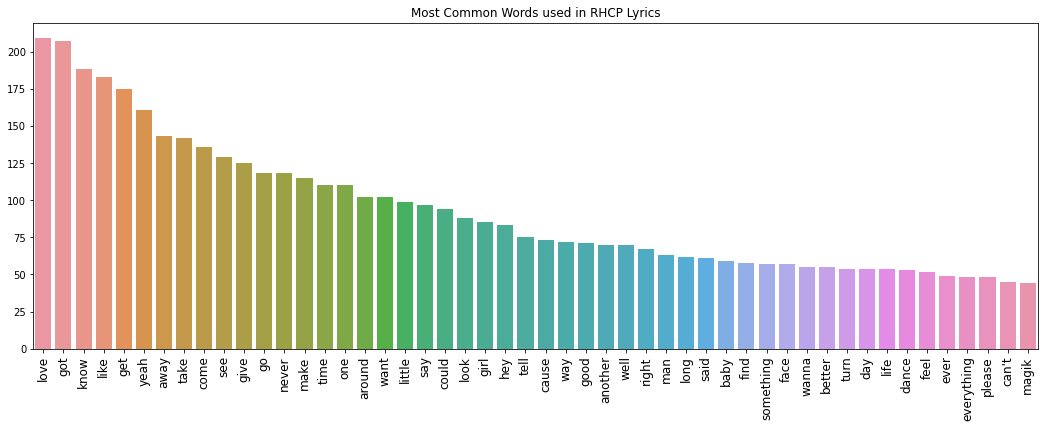

In [138]:
word_counts = Counter(rhcp_lyrics_stopped)
common_words = [word[0] for word in word_counts.most_common(50)]
common_counts = [word[1] for word in word_counts.most_common(50)]

plt.figure(figsize=(18, 6))
sns.barplot(x=common_words, y=common_counts)
plt.title("Most Common Words used in RHCP Lyrics")
plt.xticks(rotation=90, fontsize=12)
plt.show()

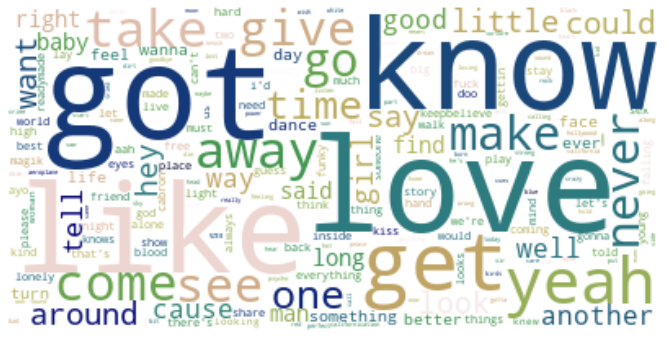

In [139]:
word_counts = Counter(rhcp_lyrics_stopped)
cloud = WordCloud(max_font_size=80,colormap="gist_earth", background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(16,6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [140]:
total_word_count = len(freq_dist)
top_50 = freq_dist.most_common(50)
print('Word\t\t\tNormalized Frequency')
for word in top_50:
    normalized_frequency = word[1]/total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
love 			 0.05796
got 			 0.0574
know 			 0.05214
like 			 0.05075
get 			 0.04853
yeah 			 0.04465
away 			 0.03966
take 			 0.03938
come 			 0.03771
see 			 0.03577
give 			 0.03466
go 			 0.03272
never 			 0.03272
make 			 0.03189
time 			 0.0305
one 			 0.0305
around 			 0.02829
want 			 0.02829
little 			 0.02745
say 			 0.0269
could 			 0.02607
look 			 0.0244
girl 			 0.02357
hey 			 0.02302
tell 			 0.0208
cause 			 0.02024
way 			 0.01997
good 			 0.01969
another 			 0.01941
well 			 0.01941
right 			 0.01858
man 			 0.01747
long 			 0.01719
said 			 0.01692
baby 			 0.01636
find 			 0.01608
something 			 0.01581
face 			 0.01581
wanna 			 0.01525
better 			 0.01525
turn 			 0.01498
day 			 0.01498
life 			 0.01498
dance 			 0.0147
feel 			 0.01442
ever 			 0.01359
everything 			 0.01331
please 			 0.01331
can't 			 0.01248
magik 			 0.0122


In [141]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
rhcp_finder = BigramCollocationFinder.from_words(rhcp_lyrics_stopped)
rhcp_scored = rhcp_finder.score_ngrams(bigram_measures.raw_freq)
rhcp_scored[:50]

[(('give', 'away'), 0.004075216859754323),
 (('away', 'give'), 0.0036676951737788905),
 (('yeah', 'yeah'), 0.0023286953484310414),
 (('sex', 'magik'), 0.0018629562787448332),
 (('dance', 'dance'), 0.001746521511323281),
 (('ayo', 'ayo'), 0.001630086743901729),
 (('magik', 'sex'), 0.001630086743901729),
 (('em', 'see'), 0.0012807824416370729),
 (('fuck', 'em'), 0.0012807824416370729),
 (('got', 'got'), 0.0012807824416370729),
 (('look', 'face'), 0.0012807824416370729),
 (('see', 'look'), 0.0012807824416370729),
 (('good', 'god'), 0.001222565057926297),
 (('lay', 'lay'), 0.001222565057926297),
 (('see', 'around'), 0.001222565057926297),
 (('aah', 'aah'), 0.0011643476742155207),
 (('cabron', 'cabron'), 0.0011643476742155207),
 (('face', 'fuck'), 0.0011643476742155207),
 (('see', 'gettin'), 0.0011643476742155207),
 (('come', 'get'), 0.0011061302905047447),
 (('like', 'dirt'), 0.0011061302905047447),
 (('look', 'around'), 0.0011061302905047447),
 (('one', 'big'), 0.0010479129067939687),
 ((

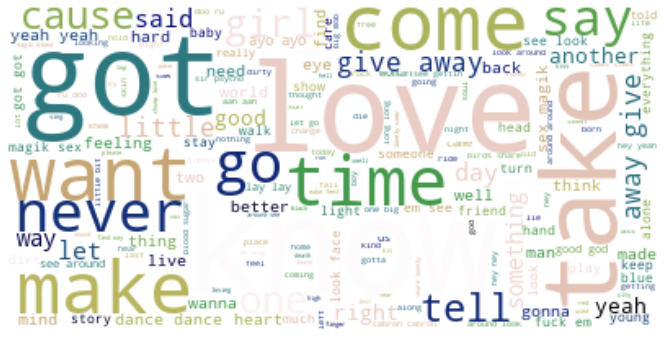

In [142]:
rhcp_lyr_str = ' '.join(rhcp_lyrics_stopped)
cloud = WordCloud(max_font_size=80,colormap="gist_earth", 
                  collocations=2, background_color='white').generate(rhcp_lyr_str)
plt.figure(figsize=(16,6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [143]:
#groupby album and see how/if freq dist. is different/same - def function for this 

def album_word_freq(df, album_name, n):
    album = df.get(df['album'] == album_name)
    stopped_lyrics = []
    for i in range(len(album['stopped_lyrics'])):
        song = album['stopped_lyrics'][i]
        for x in range(len(song)):
            word = song[x]
            stopped_lyrics.append(word)
    
    word_counts = Counter(stopped_lyrics)
    cloud = WordCloud(max_font_size=80,colormap="gist_earth", 
                      background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(16,6))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

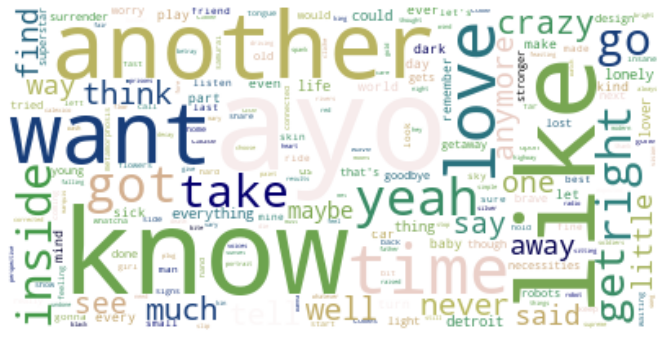

In [144]:
album_word_freq(rhcp, 'The Getaway', 50)

In [145]:
rhcp['album'].value_counts()
# album_word_freq(rhcp, 'Californiacation', 50)

Stadium Arcadium              24
Blood Sugar Sex Magik         16
Californication               14
By the Way                    14
One Hot Minute                13
The Getaway                   13
I’m with You                  11
The Uplift Mofo Party Plan     7
Freaky Styley                  4
Mother’s Milk                  2
Name: album, dtype: int64

In [146]:
# album_names = list(rhcp.album.unique())
# album_names

# for albums in range(len(album_names)):
#     album_word_freq(rhcp, album_names[albums], 20)

## EDA - other song info

In [147]:
rhcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uri               118 non-null    object 
 1   track             118 non-null    object 
 2   duration_ms       118 non-null    object 
 3   explicit          118 non-null    object 
 4   track_number      118 non-null    object 
 5   danceability      118 non-null    float64
 6   energy            118 non-null    float64
 7   key               118 non-null    object 
 8   loudness          118 non-null    float64
 9   speechiness       118 non-null    float64
 10  acousticness      118 non-null    float64
 11  instrumentalness  118 non-null    float64
 12  liveness          118 non-null    float64
 13  valence           118 non-null    float64
 14  tempo             118 non-null    float64
 15  popularity        118 non-null    int64  
 16  album             118 non-null    object 
 1

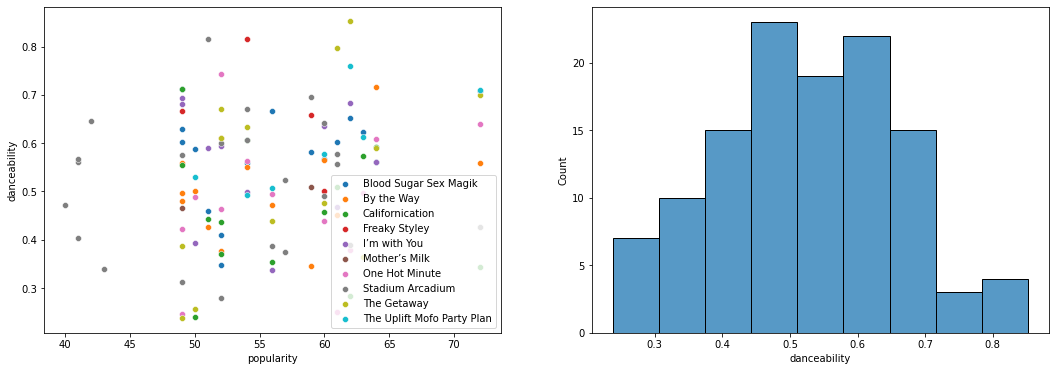

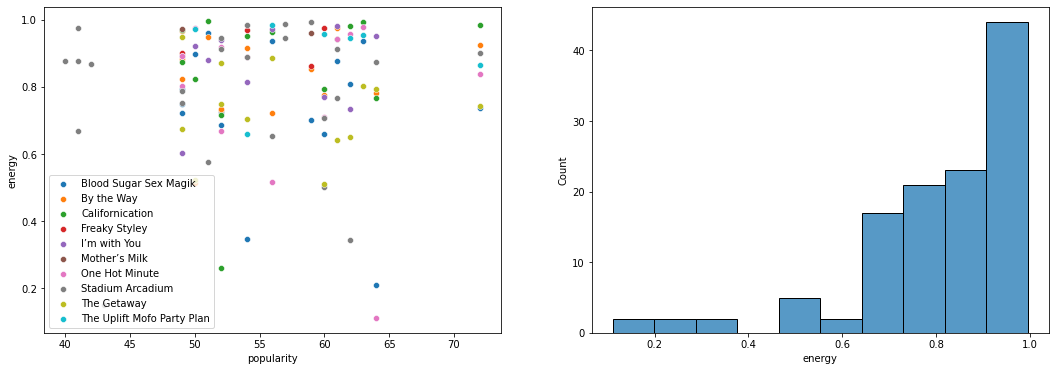

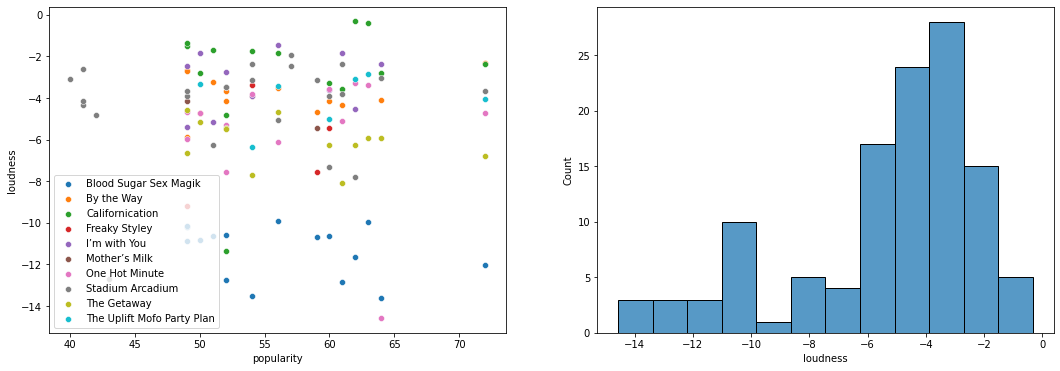

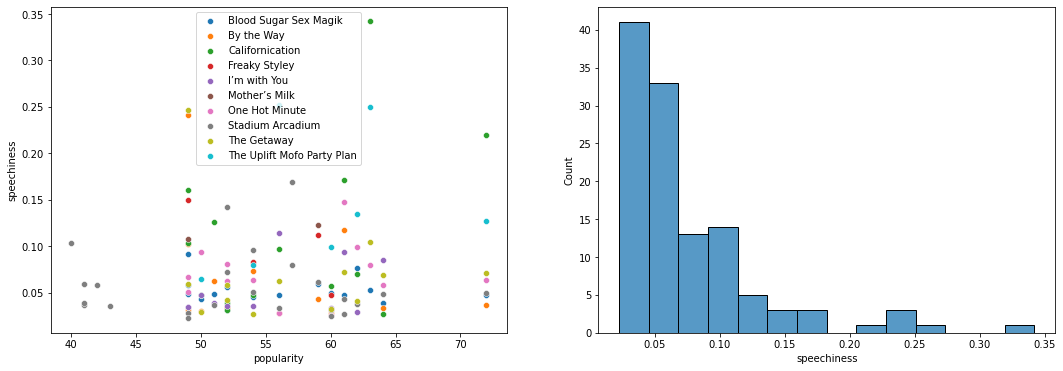

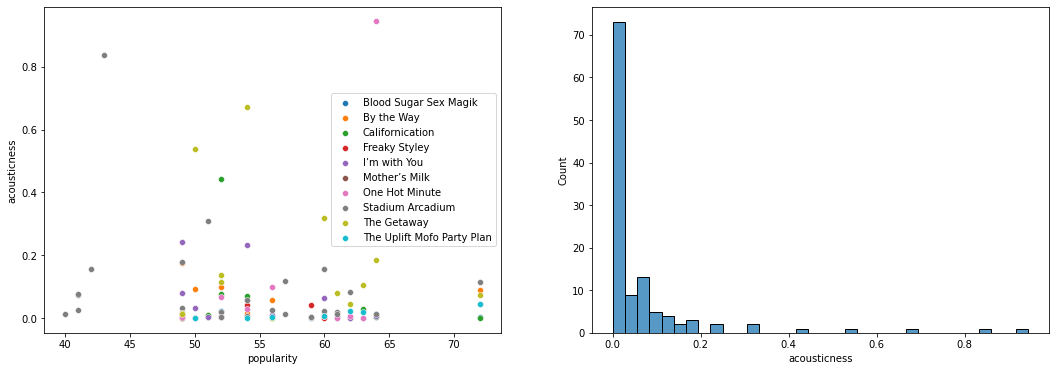

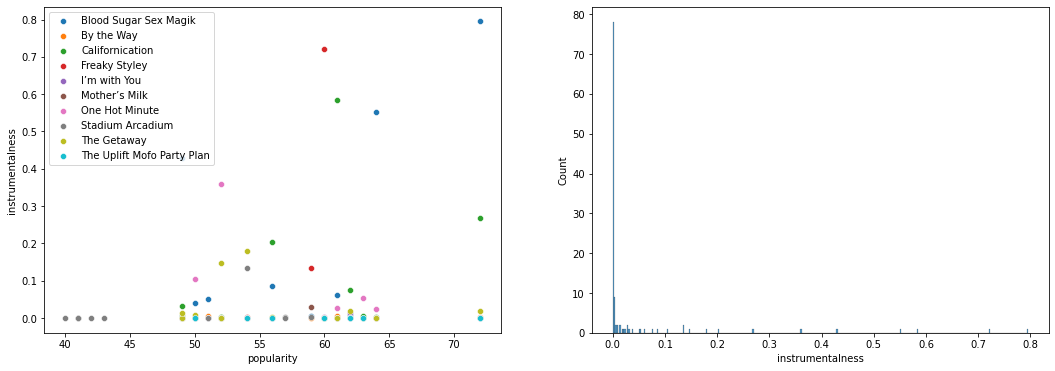

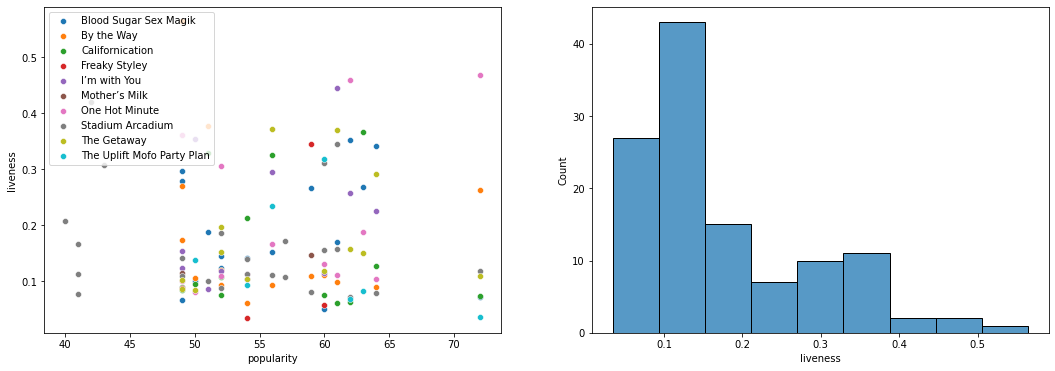

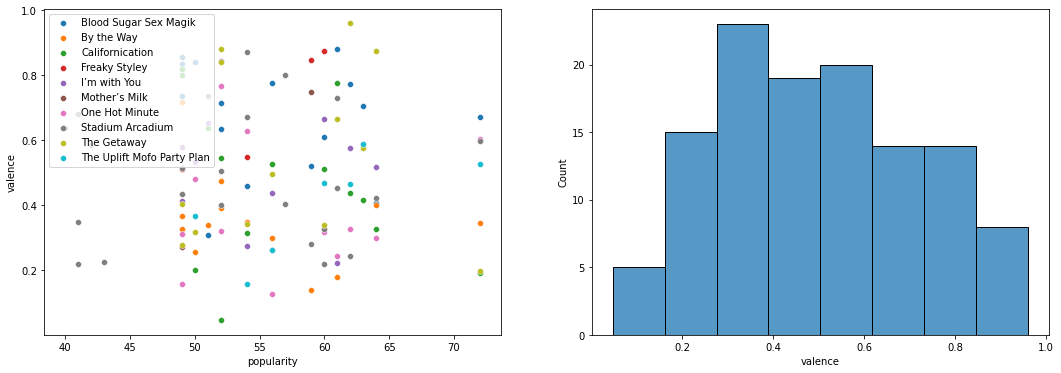

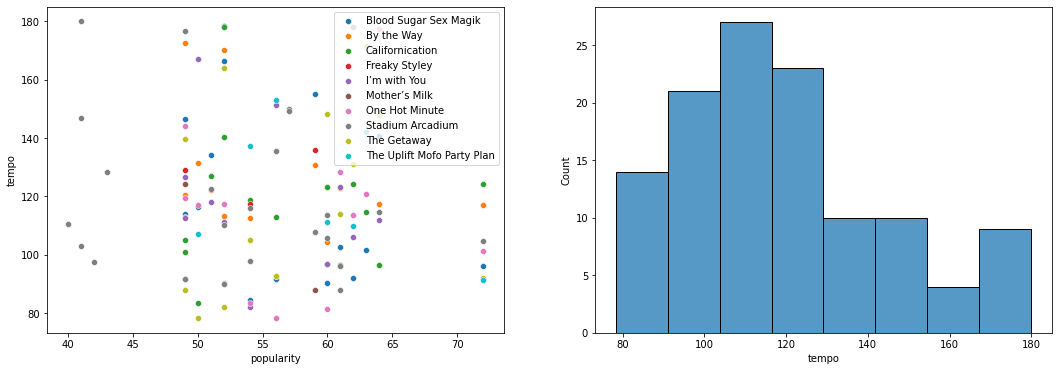

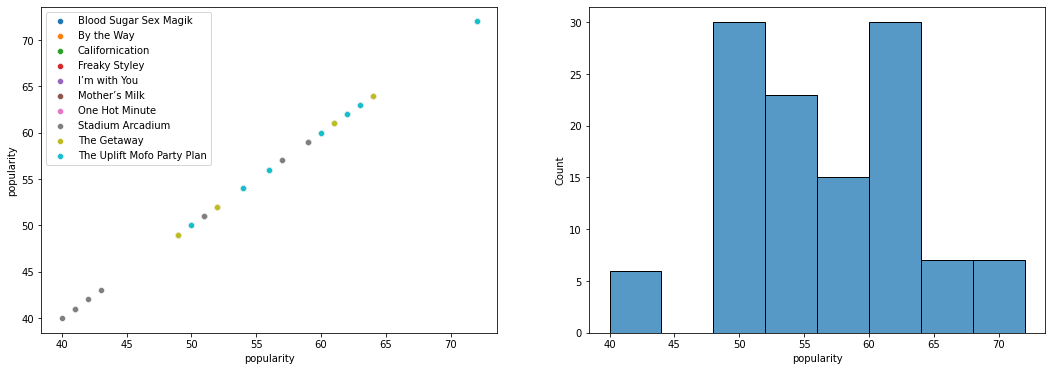

In [148]:
grouped = rhcp.groupby('album')
cont_var = rhcp.select_dtypes(exclude='object').columns

for column in cont_var:
    fix, ax = plt.subplots(1,2, figsize=(18,6))
    for name, group in grouped:
        sns.scatterplot(x=group['popularity'], y=group[column], label=name, ax=ax[0])
    sns.histplot(data=rhcp, x=column, ax=ax[1])
    plt.show()

## Regression - Song Info to predict popularity

In [149]:
rhcp.head()

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,...,instrumentalness,liveness,valence,tempo,popularity,album,lyrics,cleaned_lyrics,tokenized_lyrics,stopped_lyrics
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,...,0.000012,0.371,0.667,113.999,61,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",[that's right you're right we will do our thin...,"[that's, right, you're, right, we, will, do, o...","[that's, right, right, thing, tonight, alright..."
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,...,0.019900,0.110,0.197,91.959,72,The Getaway,"[Verse 1]\nComin' on to the light of day, we g...","[comin' on to the light of day we got, many mo...","[comin, on, to, the, light, of, day, we, got, ...","[comin, light, day, got, many, moons, deep, pl..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,...,0.147000,0.152,0.842,164.038,52,The Getaway,[Intro]\nWe got large and we got small\nWe got...,"[we got large and we got small, we got a swimm...","[we, got, large, and, we, got, small, we, got,...","[got, large, got, small, got, swimming, pool, ..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,...,0.000129,0.119,0.339,148.158,60,The Getaway,[Verse 1]\nThrow me all around like a boomeran...,"[throw me all around like a boomerang sky, wha...","[throw, me, all, around, like, a, boomerang, s...","[throw, around, like, boomerang, sky, whatever..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,...,0.000066,0.150,0.577,171.597,63,The Getaway,[Verse 1]\nSuicide a month before I met you\nD...,"[suicide a month before i met you, deep regret...","[suicide, a, month, before, i, met, you, deep,...","[suicide, month, met, deep, regrets, never, co..."


In [85]:
# floats = ['duration_ms', 'track_number', 'danceability', 'energy', 'key', 'loudness', 'speechiness',
#           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity']
# for column in floats:
#     rhcp[column] = rhcp[column].astype(int)
    
# rhcp.info()

In [152]:
# explicit_dummies = pd.get_dummies(rhcp['explicit'], drop_first=True)
# album_dum = pd.get_dummies(rhcp['album'], drop_first=True)
rhcp_reg = rhcp.drop(columns=['explicit', 'album', 'track', 'uri',
                              'tokenized_lyrics', 'cleaned_lyrics',
                              'track_number','popularity','lyrics','explicit'], axis=1)
# rhcp_reg = pd.concat([rhcp_reg, explicit_dummies], axis=1)
rhcp_reg

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stopped_lyrics
0,250386,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999,"[that's, right, right, thing, tonight, alright..."
1,302000,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959,"[comin, light, day, got, many, moons, deep, pl..."
2,200466,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038,"[got, large, got, small, got, swimming, pool, ..."
3,211520,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158,"[throw, around, like, boomerang, sky, whatever..."
4,268733,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597,"[suicide, month, met, deep, regrets, never, co..."
...,...,...,...,...,...,...,...,...,...,...,...,...
113,250733,0.530,0.974,4,-3.313,0.0644,0.000809,0.000709,0.1380,0.366,107.023,"[welcome, friends, thoughts, fax, city, four, ..."
114,137040,0.667,0.900,8,-9.201,0.1500,0.013100,0.000000,0.0889,0.511,128.905,"[middle, june, summer, young, cool, shot, bad,..."
115,97226,0.658,0.863,11,-7.565,0.1120,0.040900,0.135000,0.3460,0.847,135.839,"[time, swing, little, melody, make, feel, some..."
116,529373,0.501,0.977,9,-5.421,0.0471,0.000559,0.721000,0.0573,0.876,96.796,"[fuck, em, see, look, face, fuck, em, see, loo..."


In [54]:
# rhcp_reg.rename(columns={True:'explicit'}, inplace=True)
# rhcp_reg.columns

In [55]:
# y = rhcp_reg['']
# X = rhcp_reg['lyrics']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [79]:
def log_transform(x):
    x = x+1
    return np.log(x)
transformer = FunctionTransformer(log_transform)

# # pipeline = Pipeline([('ss', StandardScaler()), ('transform', transformer), ('regressor', model)])


# def reg_model(model, X_train, X_test, y_train, y_test):
    
#     pipeline = Pipeline([('ss', StandardScaler()), ('transform', transformer), ('regressor', model)])
    
#     pipeline.fit(X_train, y_train)
#     pipeline.score(X_test, y_test)
    
#     return model

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [61]:
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

X = rhcp_reg['stopped_lyrics']
y = rhcp_reg.drop(columns=['stopped_lyrics'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
# X_train = X_train.values.reshape(-1,1)
# X_test = X_test.values.reshape(-1,1)

y_train_new = tfidf.fit(X_train)
tfidf.vocabulary_
vector = tfidf.transform(X_train)
vector.shape

(94, 3215)

In [62]:
df_train = pd.DataFrame(vector.toarray(), columns = tfidf.get_feature_names())
df_train

,aah,abandonment,abel,ability,aboard,abortion,absurd,acceleration,according,account,...,yet,yo,youembedshare,young,younger,zaniest,zapp,zodiac,zone,zulu
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075167,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.156704,0.046246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
vector2 = tfidf.transform(X_test)
df_test = pd.DataFrame(vector2.toarray(), columns = tfidf.get_feature_names())
df_test

,aah,abandonment,abel,ability,aboard,abortion,absurd,acceleration,according,account,...,yet,yo,youembedshare,young,younger,zaniest,zapp,zodiac,zone,zulu
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.147128,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.033674,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
6,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
7,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
8,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
9,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [64]:
# y = 
# X = rhcp_reg['danceability']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# vectorizer = TfidfVectorizer(stop_words='english')
# y_train_new = vectorizer.fit_transform(y_train)


In [65]:
# y = rhcp_reg['lyrics']
# X = rhcp_reg['danceability']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
# X_train = X_train.values.reshape(-1,1)
# X_test = X_test.values.reshape(-1,1)

# vectorizer = TfidfVectorizer(stop_words='english')
# y_train_new = vectorizer.fit_transform(y_train)
# y_test_new = vectorizer.fit(y_test)

In [66]:
model = LinearRegression()
single_reg(model, df_train, df_test, y_train['danceability'], y_test['danceability'])

Train Root Mean Square Error: 3.0512337350051727e-16
Test Root Mean Square Error: 0.14824754624716363


LinearRegression()

In [67]:
tfidf.vocabulary_

{'woke': 3153,
 'morning': 1816,
 'like': 1566,
 'always': 61,
 'still': 2674,
 'think': 2845,
 'new': 1876,
 'time': 2879,
 'gets': 1152,
 'way': 3082,
 'strawberries': 2695,
 'left': 1540,
 'decay': 708,
 "can't": 404,
 'find': 1026,
 'pants': 1970,
 'bank': 165,
 'account': 9,
 'slip': 2530,
 'away': 132,
 'voices': 3038,
 'start': 2650,
 'betray': 224,
 'even': 932,
 'though': 2851,
 'raised': 2185,
 'never': 1874,
 'father': 991,
 'king': 1480,
 'every': 935,
 'sunset': 2744,
 'marquis': 1687,
 'crazy': 623,
 'bother': 301,
 'old': 1918,
 'man': 1677,
 'sea': 2382,
 'laugh': 1523,
 'make': 1667,
 'joke': 1444,
 "there's": 2837,
 'hope': 1333,
 'say': 2358,
 'struck': 2707,
 'sight': 2485,
 'empty': 909,
 'hall': 1240,
 'fade': 960,
 'hunter': 1362,
 'hunted': 1361,
 'get': 1150,
 'confronted': 570,
 'seaembedshare': 2383,
 'go': 1178,
 'east': 880,
 'west': 3102,
 "y'all": 3189,
 'body': 281,
 'free': 1104,
 'less': 1547,
 'come': 548,
 'afresh': 31,
 'home': 1319,
 'moment': 1801

In [68]:
# df = pd.DataFrame(y_train_new.toarray(), columns = vectorizer.get_feature_names())
# vectorizer.get_feature_names()

In [69]:
# vectorizer = TfidfVectorizer()
# vectorized_lyrics = vectorizer.fit_transform(rhcp_reg['lyrics'])

In [70]:
y_train.columns

Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

In [71]:
lr_model_dict = {}

for column in y_train:
    lr = LinearRegression()
    lr_model_dict[column] = lr
    print(f'{column} regression metrics:')
#     if column = 'duration_ms':
#         word_count =
    single_reg(lr, df_train, df_test, y_train[column], y_test[column])
    print('\n')

duration_ms regression metrics:
Train Root Mean Square Error: 1.5009154540294452e-10
Test Root Mean Square Error: 72687.28684296062


danceability regression metrics:
Train Root Mean Square Error: 3.0512337350051727e-16
Test Root Mean Square Error: 0.14824754624716363


energy regression metrics:
Train Root Mean Square Error: 5.096211356118011e-16
Test Root Mean Square Error: 0.18980258265471217


key regression metrics:
Train Root Mean Square Error: 8.697874431795878e-15
Test Root Mean Square Error: 3.703153438566569


loudness regression metrics:
Train Root Mean Square Error: 8.655457087987337e-15
Test Root Mean Square Error: 2.8514897184781116


speechiness regression metrics:
Train Root Mean Square Error: 1.2896716932513622e-16
Test Root Mean Square Error: 0.05599247621944293


acousticness regression metrics:
Train Root Mean Square Error: 2.9390231362469234e-16
Test Root Mean Square Error: 0.22479670061744478


instrumentalness regression metrics:
Train Root Mean Square Error: 2.5

In [72]:
from sklearn.svm import LinearSVR
model_dict = {}

for column in y_train:
    svr = LinearSVR()
    model_dict[column] = svr
    print(f'{column} regression metrics:')
#     if column = 'duration_ms':
#         word_count =
    single_reg(svr, df_train, df_test, y_train[column], y_test[column])
    print('\n')

duration_ms regression metrics:
Train Root Mean Square Error: 264517.6819173436
Test Root Mean Square Error: 252954.64106373626


danceability regression metrics:
Train Root Mean Square Error: 1.7567117185553815e-05
Test Root Mean Square Error: 0.14882658591299489


energy regression metrics:
Train Root Mean Square Error: 9.344404980548551e-06
Test Root Mean Square Error: 0.18805020138069312


key regression metrics:
Train Root Mean Square Error: 2.866716773328049
Test Root Mean Square Error: 3.6598014916872996


loudness regression metrics:
Train Root Mean Square Error: 2.802094296198248
Test Root Mean Square Error: 3.1468032003316906


speechiness regression metrics:
Train Root Mean Square Error: 3.819701724775105e-06
Test Root Mean Square Error: 0.05569664021126788


acousticness regression metrics:
Train Root Mean Square Error: 4.751619392699294e-06
Test Root Mean Square Error: 0.22490928008990826


instrumentalness regression metrics:
Train Root Mean Square Error: 5.11145759204923

In [73]:
model_dict.keys()

dict_keys(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

In [74]:
for key in model_dict.keys():
    x = model_dict[key].predict(df_test)
    print(f'{key}: {x}')

duration_ms: [ 97.16358848  97.88241895  99.39869007  99.54989582  96.17736366
  97.2325073  100.23029374  98.2557239   96.782454    98.25773475
  99.78926357  98.3018938   96.1038907   97.75803157  96.80221432
  98.56220702  97.8902683   98.87228376  98.40629285  97.94779846
  97.35075314  96.65081186  98.73492625  98.7308652 ]
danceability: [0.51173774 0.53260691 0.53674932 0.48472899 0.53949089 0.57085958
 0.53029049 0.58108039 0.52863644 0.49988669 0.49936624 0.50172697
 0.49928912 0.49654626 0.5129154  0.58422947 0.49982982 0.56656748
 0.50505356 0.60045654 0.47503767 0.48552111 0.52044705 0.60576242]
energy: [0.8174094  0.8042469  0.73304628 0.78027493 0.85389293 0.74392536
 0.87003178 0.89864871 0.73414514 0.73514709 0.83623648 0.78034244
 0.78682713 0.92721236 0.85133364 0.77715541 0.72500869 0.79345167
 0.87824708 0.8572519  0.7793087  0.84433467 0.9161458  0.824913  ]
key: [4.47945927 4.68778563 4.35831759 4.44553443 4.5353718  4.55777375
 4.61741901 4.12899522 4.81112609 4.6

In [75]:
df_test.shape

(24, 3215)

In [159]:
rhcp_reg1 = rhcp.drop(columns=['explicit', 'album', 'track', 'uri',
                              'tokenized_lyrics', 'cleaned_lyrics',
                              'track_number','lyrics','explicit', 'stopped_lyrics'], axis=1)
rhcp_reg1

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,250386,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999,61
1,302000,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959,72
2,200466,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038,52
3,211520,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158,60
4,268733,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597,63
...,...,...,...,...,...,...,...,...,...,...,...,...
113,250733,0.530,0.974,4,-3.313,0.0644,0.000809,0.000709,0.1380,0.366,107.023,50
114,137040,0.667,0.900,8,-9.201,0.1500,0.013100,0.000000,0.0889,0.511,128.905,49
115,97226,0.658,0.863,11,-7.565,0.1120,0.040900,0.135000,0.3460,0.847,135.839,59
116,529373,0.501,0.977,9,-5.421,0.0471,0.000559,0.721000,0.0573,0.876,96.796,60


In [160]:
y = rhcp_reg1['popularity']
X = rhcp_reg1.drop(columns=['popularity'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [161]:
X.shape 

(118, 11)

In [163]:
len(y)

118

In [224]:
def full_reg(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([('ss', StandardScaler()), ('regressor', model)])

    pipeline.fit(X_train, y_train)
    y_hat_train = pipeline.predict(X_train)
    y_hat_test = pipeline.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    print('Train Root Mean Square Error:', train_mse**0.5)
    print('Test Root Mean Square Error:', test_mse**0.5)
    
    return model

In [200]:
model = LinearSVR()
full_reg(model, X_train, X_test, y_train, y_test)

Train Root Mean Square Error: 9.101486963836308
Test Root Mean Square Error: 7.6613357567799625


LinearSVR()

In [202]:
model = LinearRegression()
full_reg(model, X_train, X_test, y_train, y_test)

Train Root Mean Square Error: 6.9113265026289
Test Root Mean Square Error: 6.5869829664770405


LinearRegression()

In [203]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
full_reg(model, X_train, X_test, y_train, y_test)

Train Root Mean Square Error: 7.307821516645637
Test Root Mean Square Error: 10.01873245475694


LogisticRegression()

In [207]:
from sklearn.linear_model import Lars
model = Lars()
full_reg(model, X_train, X_test, y_train, y_test)

Train Root Mean Square Error: 6.9113265026289
Test Root Mean Square Error: 6.586982966477041


Lars()

In [208]:
from sklearn.linear_model import LassoLars
model = LassoLars()
full_reg(model, X_train, X_test, y_train, y_test)

Train Root Mean Square Error: 7.485711453293785
Test Root Mean Square Error: 5.369959447105551


LassoLars()

In [225]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
full_reg(model, X_train, X_test, y_train, y_test)

Train Root Mean Square Error: 6.911815144088792
Test Root Mean Square Error: 6.504245898106038


SGDRegressor()

In [226]:
model.predict(X_test)

array([ 9731.1577998 , 12263.98339843,  7382.15621729,  6501.87387883,
        8017.8462856 ,  7313.27659073,  7659.6419455 ,  3541.50687757,
        7400.30964297,  6911.66292666,  6891.2541555 , 11101.95234335,
        3305.17452678,  6555.288471  ,  7679.38440868,  6079.38398024,
        9850.94666019, 10126.35391442,  8877.51021511,  8109.99891695,
        9369.18505813,  7729.05546708,  7380.97299071,  8147.70434022])

In [227]:
#gridsearch for SGD regressor

In [173]:
#make neural network for lyric predition using seed starter words - lstm

## Language Model Designing

In [229]:
rhcp.head()

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,...,instrumentalness,liveness,valence,tempo,popularity,album,lyrics,cleaned_lyrics,tokenized_lyrics,stopped_lyrics
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,...,0.000012,0.371,0.667,113.999,61,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",[that's right you're right we will do our thin...,"[that's, right, you're, right, we, will, do, o...","[that's, right, right, thing, tonight, alright..."
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,...,0.019900,0.110,0.197,91.959,72,The Getaway,"[Verse 1]\nComin' on to the light of day, we g...","[comin' on to the light of day we got, many mo...","[comin, on, to, the, light, of, day, we, got, ...","[comin, light, day, got, many, moons, deep, pl..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,...,0.147000,0.152,0.842,164.038,52,The Getaway,[Intro]\nWe got large and we got small\nWe got...,"[we got large and we got small, we got a swimm...","[we, got, large, and, we, got, small, we, got,...","[got, large, got, small, got, swimming, pool, ..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,...,0.000129,0.119,0.339,148.158,60,The Getaway,[Verse 1]\nThrow me all around like a boomeran...,"[throw me all around like a boomerang sky, wha...","[throw, me, all, around, like, a, boomerang, s...","[throw, around, like, boomerang, sky, whatever..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,...,0.000066,0.150,0.577,171.597,63,The Getaway,[Verse 1]\nSuicide a month before I met you\nD...,"[suicide a month before i met you, deep regret...","[suicide, a, month, before, i, met, you, deep,...","[suicide, month, met, deep, regrets, never, co..."


In [233]:
all_tokens = []
for song in range(len(rhcp)):
    lyrics = rhcp['tokenized_lyrics'][song]
    for lyric in rhcp['tokenized_lyrics'][song]:
        all_tokens.append(lyric)
        
all_tokens

["that's",
 'right',
 "you're",
 'right',
 'we',
 'will',
 'do',
 'our',
 'thing',
 'tonight',
 'alright',
 'take',
 'me',
 'through',
 'the',
 'future',
 "it's",
 'time',
 "you're",
 'fine',
 'just',
 'another',
 'color',
 'coded',
 'crime',
 'incision',
 'and',
 'a',
 'suture',
 'you',
 'told',
 'my',
 'friend',
 'we',
 'would',
 'get',
 'it',
 'on',
 'no',
 'matter',
 'when',
 'a',
 'supercavitation',
 "let's",
 'go',
 'you',
 'show',
 'me',
 'something',
 'no',
 'one',
 'will',
 'ever',
 'know',
 'a',
 'love',
 'hallucination',
 'another',
 'lonely',
 'superstar',
 'to',
 'getaway',
 'inside',
 'your',
 'car',
 'take',
 'it',
 'much',
 'too',
 'far',
 'surrender',
 'to',
 'the',
 'brave',
 'inside',
 'a',
 'lover',
 'that',
 'another',
 'tried',
 'take',
 'it',
 'too',
 'my',
 'ride',
 'you',
 "don't",
 'have',
 'to',
 'keep',
 'it',
 'if',
 "it's",
 'mine',
 'another',
 'lonely',
 'superstar',
 'to',
 'getaway',
 'inside',
 'your',
 'car',
 'another',
 'place',
 'maybe',
 'another

In [234]:
print('Total Tokens: %d' % len(all_tokens))
print('Unique Tokens: %d' % len(set(all_tokens)))

Total Tokens: 34541
Unique Tokens: 3751


In [236]:
rhcp['cleaned_lyrics'][0][0]

"that's right you're right we will do our thing tonight alright"

In [240]:
sentence_tokens = []
for song in range(len(rhcp)):
    lyrics = rhcp['cleaned_lyrics'][song]
    for lyric in rhcp['cleaned_lyrics'][song]:
        sentence_tokens.append(lyric)

sentence_tokens 

["that's right you're right we will do our thing tonight alright",
 'take me through the future',
 "it's time you're fine just another color coded crime",
 'incision and a suture',
 'you told my friend we would get it on no matter when',
 'a supercavitation',
 "let's go you show me something no one will ever know",
 'a love hallucination',
 'another lonely superstar to getaway inside your car',
 'take it much too far',
 'surrender to the brave inside a lover that another tried',
 'take it too my ride',
 "you don't have to keep it if it's mine",
 'another lonely superstar to getaway inside your car',
 'another place maybe another time',
 'surrender to the brave inside a lover that another tried',
 "complete repeat sittin' in your car and on your street",
 'lost in california',
 "let's steal this wheel take a spin to find out how we feel",
 'just around the corner',
 'slow down for sound turn it up and no we can’t be found',
 'the body that we transcend',
 'asleep you weep find out that 

In [241]:
print('Total Tokens: %d' % len(sentence_tokens))
print('Unique Tokens: %d' % len(set(sentence_tokens)))

Total Tokens: 5166
Unique Tokens: 3493


In [242]:
sentence_tokens = list(set(sentence_tokens))

In [243]:
from keras_preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence_tokens)
total_words = len(tokenizer.word_index) + 1
total_words

3813

In [244]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'to': 3,
 'a': 4,
 'you': 5,
 'and': 6,
 'my': 7,
 'in': 8,
 'of': 9,
 'me': 10,
 'it': 11,
 'your': 12,
 'that': 13,
 'is': 14,
 'on': 15,
 'for': 16,
 'all': 17,
 'we': 18,
 "i'm": 19,
 "it's": 20,
 'do': 21,
 'got': 22,
 'love': 23,
 'be': 24,
 'with': 25,
 'what': 26,
 'so': 27,
 'like': 28,
 'but': 29,
 'know': 30,
 'get': 31,
 'now': 32,
 'oh': 33,
 "don't": 34,
 'she': 35,
 'when': 36,
 'this': 37,
 'up': 38,
 'just': 39,
 'take': 40,
 'come': 41,
 'no': 42,
 'her': 43,
 'can': 44,
 'make': 45,
 'yeah': 46,
 'not': 47,
 'one': 48,
 'time': 49,
 'from': 50,
 'never': 51,
 'little': 52,
 'are': 53,
 'want': 54,
 'down': 55,
 'could': 56,
 'go': 57,
 'will': 58,
 'say': 59,
 'see': 60,
 'out': 61,
 'was': 62,
 "i've": 63,
 'into': 64,
 "you're": 65,
 'girl': 66,
 'away': 67,
 'around': 68,
 "i'll": 69,
 'have': 70,
 'where': 71,
 'good': 72,
 'man': 73,
 'tell': 74,
 'if': 75,
 'another': 76,
 'right': 77,
 'there': 78,
 "'cause": 79,
 'some': 80,
 'by': 81,
 '

In [246]:
input_seq = []

for line in sentence_tokens:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        ngram_seq = token_list[:i+1]
        input_seq.append(ngram_seq)
        
input_seq

[[18, 53],
 [18, 53, 1],
 [18, 53, 1, 644],
 [18, 53, 1, 644, 13],
 [18, 53, 1, 644, 13, 58],
 [18, 53, 1, 644, 13, 58, 45],
 [18, 53, 1, 644, 13, 58, 45, 5],
 [18, 53, 1, 644, 13, 58, 45, 5, 90],
 [18, 53, 1, 644, 13, 58, 45, 5, 90, 99],
 [1582, 61],
 [1582, 61, 13],
 [1582, 61, 13, 18],
 [1582, 61, 13, 18, 53],
 [1582, 61, 13, 18, 53, 17],
 [1582, 61, 13, 18, 53, 17, 1],
 [1582, 61, 13, 18, 53, 17, 1, 48],
 [1582, 61, 13, 18, 53, 17, 1, 48, 1583],
 [5, 59],
 [5, 59, 461],
 [5, 59, 461, 6],
 [5, 59, 461, 6, 106],
 [5, 59, 461, 6, 106, 2],
 [5, 59, 461, 6, 106, 2, 59],
 [5, 59, 461, 6, 106, 2, 59, 2],
 [5, 59, 461, 6, 106, 2, 59, 2, 21],
 [210, 39],
 [210, 39, 4],
 [210, 39, 4, 73],
 [210, 39, 4, 73, 6],
 [210, 39, 4, 73, 6, 139],
 [210, 39, 4, 73, 6, 139, 189],
 [210, 39, 4, 73, 6, 139, 189, 229],
 [210, 39, 4, 73, 6, 139, 189, 229, 58],
 [210, 39, 4, 73, 6, 139, 189, 229, 58, 24],
 [210, 39, 4, 73, 6, 139, 189, 229, 58, 24, 293],
 [127, 3],
 [127, 3, 24],
 [127, 3, 24, 25],
 [127, 3,

In [248]:
from keras_preprocessing.sequence import pad_sequences

max_length = max([len(x) for x in input_seq])
input_seq = np.array(pad_sequences(input_seq, maxlen=max_length, padding='pre'))
input_seq

array([[   0,    0,    0, ...,    0,   18,   53],
       [   0,    0,    0, ...,   18,   53,    1],
       [   0,    0,    0, ...,   53,    1,  644],
       ...,
       [   0,    0,    0, ...,   73,    8,    1],
       [   0,    0,    0, ...,    8,    1,  393],
       [   0,    0,    0, ...,    1,  393, 3812]], dtype=int32)

In [262]:
from keras.utils import to_categorical

predictors, label = input_seq[:,:-1], input_seq[:,-1]
label = to_categorical(label, num_classes=total_words)
seq_length = predictors.shape[1]

In [257]:
from keras import models, layers

In [263]:
np.random.seed(42)

model = models.Sequential()
model.add(layers.Embedding(total_words, 50, input_length=seq_length))
model.add(layers.Bidirectional(layers.LSTM(25, return_sequences=True)))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(25))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(total_words, activation='softmax'))

In [264]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 67, 50)            190650    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 67, 50)            15200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 67, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_5 (Dense)              (None, 3813)              194463    
Total params: 409,213
Trainable params: 409,213
Non-trainable params: 0
________________________________________________

In [265]:
history = model.fit(predictors,label,epochs=100, verbose=1)

Epoch 1/100
648/648 [==============================] - 52s 80ms/step - loss: 6.5773 - accuracy: 0.0387
Epoch 2/100
648/648 [==============================] - 55s 84ms/step - loss: 6.1698 - accuracy: 0.0409
Epoch 3/100
648/648 [==============================] - 54s 83ms/step - loss: 6.0311 - accuracy: 0.0483
Epoch 4/100
648/648 [==============================] - 54s 84ms/step - loss: 5.9064 - accuracy: 0.0532
Epoch 5/100
648/648 [==============================] - 65s 100ms/step - loss: 5.7823 - accuracy: 0.0560
Epoch 6/100
648/648 [==============================] - 55s 85ms/step - loss: 5.6701 - accuracy: 0.0612
Epoch 7/100
648/648 [==============================] - 55s 85ms/step - loss: 5.5727 - accuracy: 0.0657
Epoch 8/100
648/648 [==============================] - 52s 81ms/step - loss: 5.4811 - accuracy: 0.0699
Epoch 9/100
648/648 [==============================] - 53s 81ms/step - loss: 5.3881 - accuracy: 0.0748
Epoch 10/100
648/648 [==============================] - 57s 88ms/step - 

648/648 [==============================] - 53s 82ms/step - loss: 2.3232 - accuracy: 0.4486
Epoch 80/100
648/648 [==============================] - 58s 90ms/step - loss: 2.3168 - accuracy: 0.4470
Epoch 81/100
648/648 [==============================] - 71s 109ms/step - loss: 2.2981 - accuracy: 0.4494
Epoch 82/100
648/648 [==============================] - 54s 84ms/step - loss: 2.2908 - accuracy: 0.4506
Epoch 83/100
648/648 [==============================] - 54s 83ms/step - loss: 2.2659 - accuracy: 0.4549
Epoch 84/100
648/648 [==============================] - 54s 83ms/step - loss: 2.2625 - accuracy: 0.4559
Epoch 85/100
648/648 [==============================] - 55s 85ms/step - loss: 2.2341 - accuracy: 0.4601
Epoch 86/100
648/648 [==============================] - 54s 84ms/step - loss: 2.2349 - accuracy: 0.4642
Epoch 87/100
648/648 [==============================] - 55s 85ms/step - loss: 2.2146 - accuracy: 0.4681
Epoch 88/100
648/648 [==============================] - 61s 94ms/step - loss

In [266]:
from pickle import dump, load 

model.save('model.h5')
dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [269]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['loss'])
    plt.legend(['loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['accuracy'])
    plt.legend(['acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

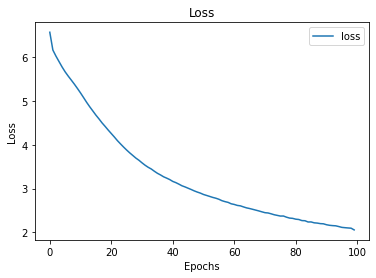

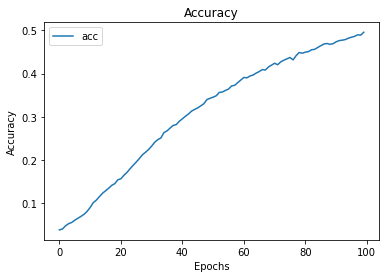

In [270]:
visualize_training_results(history)

In [289]:
def make_lyrics(seed_txt, next_words):
#     results = list()
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_txt])[0]
        token_list = pad_sequences([token_list], maxlen=seq_length, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_txt += " " + output_word
#         results.append(output_word)
#     return ' '.join(results)
    return seed_txt

In [293]:
make_lyrics('love', 4)

'love out there and where'

In [294]:
make_lyrics('i go', 4)

'i go this time to find'

In [295]:
make_lyrics('friend',5)

'friend the goods mixing she have'

In [296]:
make_lyrics('ayo', 6)

'ayo ayo ayo ayo this time bo'

In [297]:
make_lyrics('goodbye', 20)

"goodbye me now doobley do it if i do this time everything for you to be a minor thing y'all it's"